<a href="https://colab.research.google.com/github/swagata0207/DSP_NPTEL/blob/main/Apy_NPTEL_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Connecting google drive with colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Datasets/apy_filtered.csv')
df.head(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Autumn,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Autumn,Other kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Autumn,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
# No. of rows and columns
df.shape

(241699, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241699 entries, 0 to 241698
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     241699 non-null  object 
 1   District_Name  241699 non-null  object 
 2   Crop_Year      241699 non-null  int64  
 3   Season         241699 non-null  object 
 4   Crop           241699 non-null  object 
 5   Area           241699 non-null  float64
 6   Production     241699 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 12.9+ MB


In [ ]:
df_yrcp = df.groupby(['Crop_Year', 'Crop']).sum()
df_yrcp = df_yrcp.reset_index()
df_yrcp

,Crop_Year,Crop,Area,Production
0,1997,Arecanut,260686.0,308584.0
1,1997,Arhar/Tur,3325278.0,1693632.0
2,1997,Bajra,9527424.0,7622765.0
3,1997,Banana,216302.0,8577683.0
4,1997,Barley,772715.0,1586845.0
...,...,...,...,...
1137,2015,Small millets,2853.0,2911.0
1138,2015,Soyabean,3278.0,3190.0
1139,2015,Sugarcane,8962.0,577157.2
1140,2015,Urad,77222.0,27063.1


In [ ]:
df_yrcp = df_yrcp.drop('Crop_Year', axis = 1)
df_yrcp = df_yrcp.groupby('Crop').mean()
df_yrcp = df_yrcp.reset_index()
df_yrcp

,Crop,Area,Production
0,Arecanut,3.413949e+05,1.181880e+06
1,Arhar/Tur,3.210463e+06,2.185077e+06
2,Bajra,7.831549e+06,7.204500e+06
3,Banana,2.913760e+05,8.118482e+06
4,Barley,5.474573e+05,1.163067e+06
...,...,...,...
96,Turmeric,1.517393e+05,5.536802e+05
97,Turnip,4.010000e+02,1.815000e+02
98,Urad,2.501884e+06,1.179500e+06
99,Varagu,6.823714e+03,7.099143e+03


In [ ]:
# 5 most produced crop in India
df_yrcp = df_yrcp.sort_values(by = 'Production', ascending = False)
df_yrcp.head(5)

,Crop,Area,Production
20,Coconut,1.574259e+06,7.221202e+09
87,Sugarcane,4.034538e+06,2.913517e+08
78,Rice,3.927993e+07,8.449844e+07
100,Wheat,2.477438e+07,7.014872e+07
72,Potato,1.170147e+06,2.235928e+07


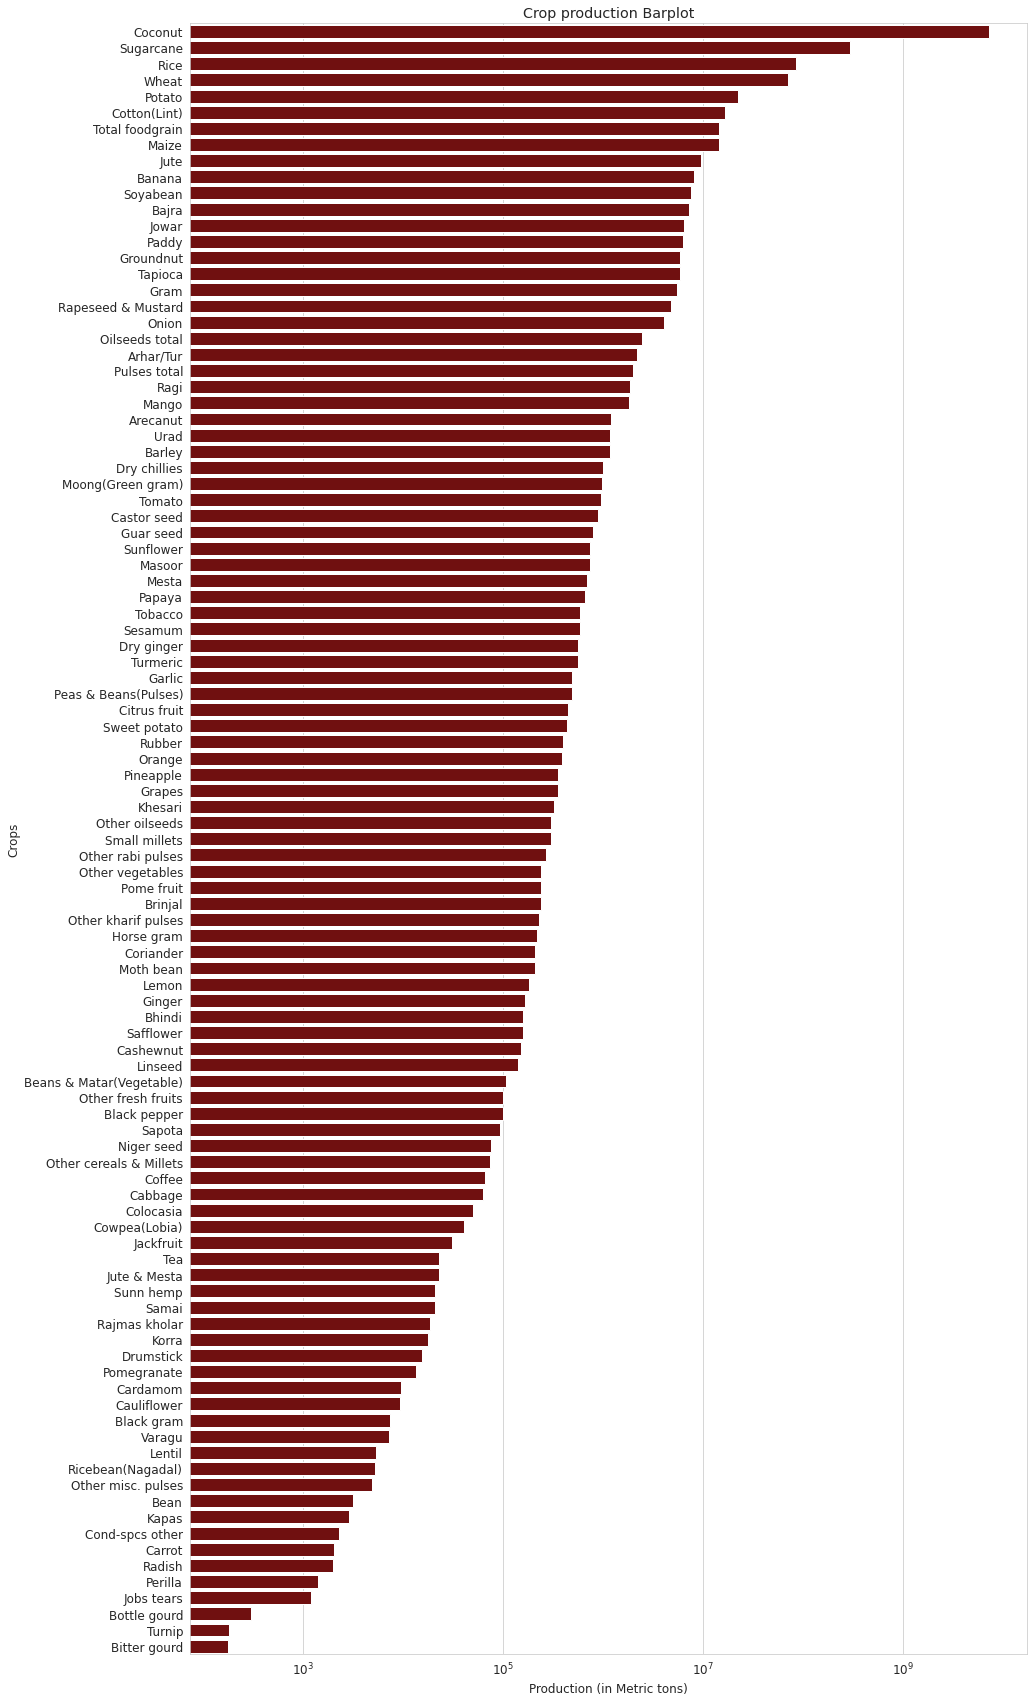

In [ ]:
# Barplot of crop production in log scale
f = plt.figure(figsize = (15, 30))
plt.rcParams.update({'font.size': 12})
plt.xscale('log')
sns.barplot(x = df_yrcp.Production, y = df_yrcp.Crop, color = 'maroon')
plt.xlabel('Production (in Metric tons)')
plt.ylabel('Crops')
plt.title('Crop production Barplot')

# To save the plot in google drive
f.savefig('/content/gdrive/My Drive/Datasets/Plots/yrcp.png', dpi = 600)

In [ ]:
# 
df_coconut = df[df['Crop'] == 'Coconut']
df_sugarcane = df[df['Crop'] == 'Sugarcane']
df_rice = df[df['Crop'] == 'Rice']
df_wheat = df[df['Crop'] == 'Wheat']
df_potato = df[df['Crop'] == 'Potato']

In [ ]:
# Top 5 coconut producing states in India
df_coconut_yrp = df_coconut.groupby(['State_Name','Crop_Year']).sum()
df_coconut_yrp = df_coconut_yrp.reset_index()
df_coconut_yrp = df_coconut_yrp.drop('Crop_Year', axis = 1)
df_coconut_yrp = df_coconut_yrp.groupby(['State_Name']).mean()
df_coconut_yrp = df_coconut_yrp.sort_values(by = 'Production', ascending = False)
df_coconut_yrp.head(5)

,Area,Production
State_Name,,
Kerala,861336.226111,5.433502e+09
Andhra Pradesh,102531.307692,1.292769e+09
Tamil Nadu,377723.200000,1.093774e+09
Assam,20167.937500,1.221505e+08
Andaman and Nicobar Islands,23840.281250,8.972375e+07


In [ ]:
# Top 5 sugarcane producing states in India
df_sugarcane_yrp = df_sugarcane.groupby(['State_Name','Crop_Year']).sum()
df_sugarcane_yrp = df_sugarcane_yrp.reset_index()
df_sugarcane_yrp = df_sugarcane_yrp.drop('Crop_Year', axis = 1)
df_sugarcane_yrp = df_sugarcane_yrp.groupby(['State_Name']).mean()
df_sugarcane_yrp = df_sugarcane_yrp.sort_values(by = 'Production', ascending = False)
df_sugarcane_yrp.head(5)

,Area,Production
State_Name,,
Uttar Pradesh,2.081665e+06,1.223819e+08
Maharashtra,6.773369e+05,5.520506e+07
Tamil Nadu,3.099531e+05,4.985275e+07
Karnataka,3.587367e+05,3.224034e+07
Gujarat,1.945250e+05,1.325142e+07


In [ ]:
# Top 5 rice producing states in India
df_rice_yrp = df_rice.groupby(['State_Name','Crop_Year']).sum()
df_rice_yrp = df_rice_yrp.reset_index()
df_rice_yrp = df_rice_yrp.drop('Crop_Year', axis = 1)
df_rice_yrp = df_rice_yrp.groupby(['State_Name']).mean()
df_rice_yrp = df_rice_yrp.sort_values(by = 'Production', ascending = False)
df_rice_yrp.head(5)

,Area,Production
State_Name,,
West Bengal,5.666303e+06,1.433849e+07
Uttar Pradesh,5.743352e+06,1.215519e+07
Punjab,2.672167e+06,9.983444e+06
Andhra Pradesh,2.586017e+06,7.985692e+06
Odisha,4.759836e+06,6.634597e+06


In [ ]:
# Top 5 wheat producing states in India
df_wheat_yrp = df_wheat.groupby(['State_Name','Crop_Year']).sum()
df_wheat_yrp = df_wheat_yrp.reset_index()
df_wheat_yrp = df_wheat_yrp.drop('Crop_Year', axis = 1)
df_wheat_yrp = df_wheat_yrp.groupby(['State_Name']).mean()
df_wheat_yrp = df_wheat_yrp.sort_values(by = 'Production', ascending = False)
df_wheat_yrp.head(5)

,Area,Production
State_Name,,
Uttar Pradesh,9.367465e+06,2.610621e+07
Punjab,3.452111e+06,1.538589e+07
Haryana,2.358433e+06,9.915438e+06
Madhya Pradesh,4.375902e+06,8.656109e+06
Rajasthan,2.400966e+06,6.762080e+06


In [ ]:
# Top 5 potato producing states in India
df_potato_yrp = df_potato.groupby(['State_Name','Crop_Year']).sum()
df_potato_yrp = df_potato_yrp.reset_index()
df_potato_yrp = df_potato_yrp.drop('Crop_Year', axis = 1)
df_potato_yrp = df_potato_yrp.groupby(['State_Name']).mean()
df_potato_yrp = df_potato_yrp.sort_values(by = 'Production', ascending = False)
df_potato_yrp.head(5)

,Area,Production
State_Name,,
Uttar Pradesh,479002.166667,1.067047e+07
West Bengal,357409.166667,8.609828e+06
Bihar,143348.636364,1.275956e+06
Gujarat,46168.750000,1.080188e+06
Madhya Pradesh,58776.428571,7.418713e+05


In [ ]:
# Geopandas library is not installed in Colab by default
# Need to be installed separately
!pip install --upgrade geopandas

     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 15.4 MB 29.4 MB/s 
     |████████████████████████████████| 6.3 MB 26.9 MB/s 


In [ ]:
!pip install --upgrade pyshp

     |████████████████████████████████| 219 kB 4.1 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=02ba46ce051620cca1993877404f7c89aec86249d5ca2c50b1084dfbc7350c2c
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [ ]:
!pip install --upgrade descartes

In [ ]:
import geopandas as gpd

In [ ]:
map_df = gpd.read_file('/content/gdrive/My Drive/Datasets/Ind_map/polbnda_ind.shp')

In [ ]:
# Slicing the map of West Bengal from map of India
map_wb_df = map_df[map_df['nam'] == 'WEST BENGAL']
map_wb_df.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry
229,FA001,IND,WEST BENGAL,DARJEELING,-99999999,0,UNK,UNK,IND,"POLYGON ((88.52539 27.17819, 88.53365 27.17778..."
230,FA001,IND,WEST BENGAL,JALPAIGURI,-99999999,0,UNK,UNK,IND,"POLYGON ((88.87119 26.96381, 88.87171 26.96118..."
234,FA001,IND,WEST BENGAL,COOCHBEHAR,-99999999,0,UNK,UNK,IND,"POLYGON ((89.83556 26.41260, 89.83173 26.40359..."
235,FA001,IND,WEST BENGAL,DINAJPUR UTTAR,-99999999,0,UNK,UNK,IND,"POLYGON ((88.24062 26.44954, 88.24059 26.45300..."
238,FA001,IND,WEST BENGAL,COOCHBEHAR,-99999999,0,UNK,UNK,IND,"POLYGON ((88.96360 26.42879, 88.96066 26.42911..."


In [ ]:
# District-wise coconut production
df_coconut_yrp_d = df_coconut.groupby(['District_Name']).mean()
df_coconut_yrp_d = df_coconut_yrp_d.reset_index()
df_coconut_yrp_d = df_coconut_yrp_d.drop('Crop_Year', axis = 1)
df_coconut_yrp_d.rename(columns={'District_Name': 'laa'},inplace=True)
df_coconut_yrp_d.head()

,laa,Area,Production
0,24 PARAGANAS NORTH,3136.916667,1.022202e+07
1,24 PARAGANAS SOUTH,3527.166667,7.918108e+06
2,AIZAWL,2.000000,5.000000e+00
3,ALAPPUZHA,49820.980556,2.665121e+08
4,ANANTAPUR,786.230769,4.919580e+06


In [ ]:
merged_coconut_map_district = map_df.merge(df_coconut_yrp_d, on = 'laa', how = 'left')
merged_coconut_map_district['Production'] = merged_coconut_map_district['Production'].fillna(1)
merged_coconut_map_district.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry,Area,Production
0,FA001,IND,JAMMU AND KASHMIR,GILGIT,-99999999,0,UNK,UNK,IND,"POLYGON ((77.34422 35.54250, 77.33660 35.54279...",NaN,1.0
1,FA001,IND,JAMMU AND KASHMIR,TRIBAL TERRITORY,-99999999,0,UNK,UNK,IND,"POLYGON ((73.13781 35.81256, 73.14411 35.81022...",NaN,1.0
2,FA001,IND,JAMMU AND KASHMIR,GILGIT WAZARAT,-99999999,0,UNK,UNK,IND,"POLYGON ((75.07278 34.85332, 75.06958 34.83883...",NaN,1.0
3,FA001,IND,JAMMU AND KASHMIR,CHILAS,-99999999,0,UNK,UNK,IND,"POLYGON ((74.18809 35.66722, 74.23426 35.64655...",NaN,1.0
4,FA001,IND,JAMMU AND KASHMIR,MUZAFFARABAD,-99999999,0,UNK,UNK,IND,"POLYGON ((74.08553 35.07817, 74.09612 35.07642...",NaN,1.0


In [ ]:
import matplotlib.colors as clr

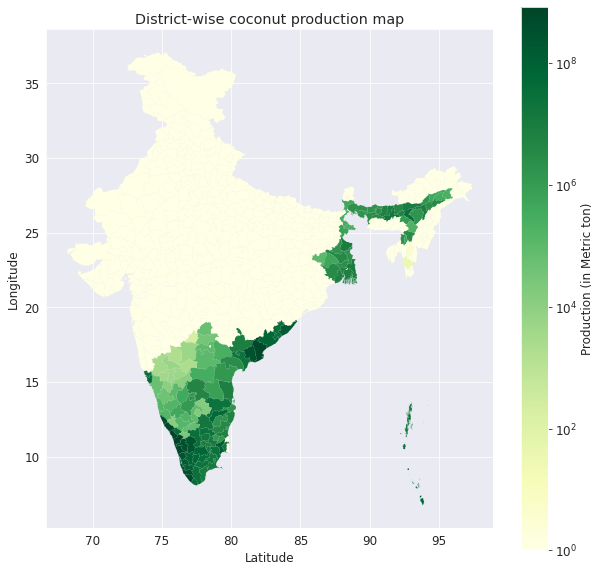

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 1, figsize = (10,10))
merged_coconut_map_district.plot(column = 'Production', cmap = 'YlGn', linewidth=0, legend = True, ax = ax,
                                 legend_kwds = {'label':'Production (in Metric ton)'}, 
                                 norm = clr.LogNorm(vmin = merged_coconut_map_district.Production.min(), 
                                                    vmax = merged_coconut_map_district.Production.max()))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('District-wise coconut production map')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/coconut_production_avg.png', dpi = 600)

In [ ]:
yearly_p_coconut = df_coconut.groupby(['Crop_Year']).sum()
yearly_p_coconut = yearly_p_coconut.reset_index()
yearly_p_coconut.head()

,Crop_Year,Area,Production
0,1997,1064229.0,6.344142e+06
1,1998,1237644.0,5.283860e+09
2,1999,1279564.0,5.859817e+09
3,2000,1437422.0,6.880409e+09
4,2001,1454159.0,6.881287e+09


In [ ]:
X_Y_Spline1 = make_interp_spline(yearly_p_coconut['Crop_Year'], yearly_p_coconut['Production'])

X_1 = np.linspace(yearly_p_coconut.Crop_Year.min(), yearly_p_coconut.Crop_Year.max(), 100)
Y_1 = X_Y_Spline1(X_1)

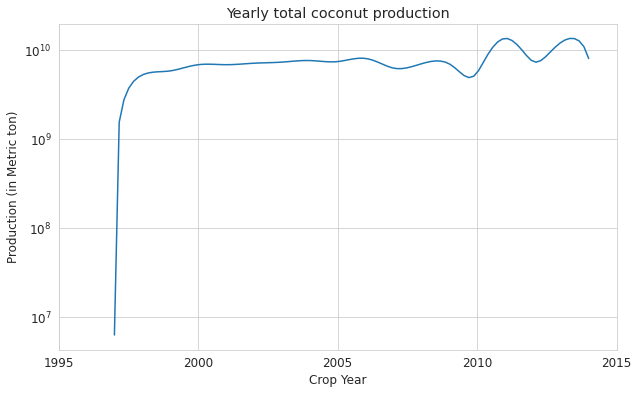

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.plot(X_1, Y_1)
plt.xticks(np.arange(1995, 2016, 5))
plt.yscale('log')
plt.xlabel('Crop Year')
plt.ylabel('Production (in Metric ton)')
plt.title('Yearly total coconut production')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/coconut_yrp.png', dpi = 600)

In [ ]:
df_coconut.describe()

,Crop_Year,Area,Production
count,1958.000000,1958.000000,1.958000e+03
mean,2005.639939,14472.251951,6.638490e+07
std,4.730615,26972.084752,1.779915e+08
min,1997.000000,1.000000,0.000000e+00
25%,2002.000000,452.000000,1.046310e+04
50%,2006.000000,1926.000000,2.391565e+05
75%,2009.000000,14462.250000,1.169568e+07
max,2014.000000,149419.000000,1.250800e+09


In [ ]:
upper_limit2 = df_coconut['Production'].quantile(0.75)
lower_limit2 = df_coconut['Production'].quantile(0.25)
upper_limit2, lower_limit2

(11695680.0, 10463.1)

In [ ]:
df_coconut_m = df_coconut[df_coconut['Production'] > lower_limit2]
df_coconut_m

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0
...,...,...,...,...,...,...,...
240795,West Bengal,NADIA,2006,Whole Year,Coconut,1002.00,13378700.0
240834,West Bengal,NADIA,2007,Whole Year,Coconut,988.00,12527800.0
240869,West Bengal,NADIA,2008,Whole Year,Coconut,991.00,12527.0
241401,West Bengal,PURULIA,2006,Whole Year,Coconut,73.00,365000.0


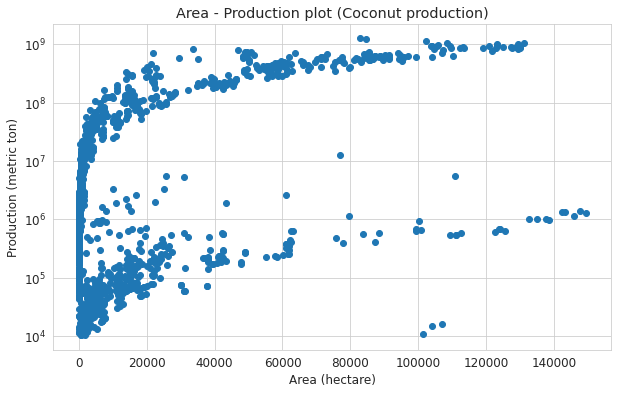

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
plt.scatter(df_coconut_m['Area'], df_coconut_m['Production'])
plt.yscale('log')
plt.xlabel('Area (hectare)')
plt.ylabel('Production (metric ton)')
plt.title('Area - Production plot (Coconut production)')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/coconut_avsp.png', dpi = 600)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_coconut_m['Area'], df_coconut_m['Production'],
                                                    train_size=0.7, test_size=0.3, random_state=42)
X_train1_df, X_test1_df = pd.DataFrame(X_train1), pd.DataFrame(X_test1)
y_train1_df, y_test1_df = pd.DataFrame(y_train1), pd.DataFrame(y_test1)
print(len(X_train1_df))
print(len(X_test1_df))

1027
441


In [ ]:
poly1 = PolynomialFeatures(degree = 2)
X_train1_poly, X_test1_poly = poly1.fit_transform(X_train1_df), poly1.fit_transform(X_test1_df)
X_train1_poly[0:5]

array([[1.00000000e+00, 2.55800000e+03, 6.54336400e+06],
       [1.00000000e+00, 1.35760000e+04, 1.84307776e+08],
       [1.00000000e+00, 2.36960000e+04, 5.61500416e+08],
       [1.00000000e+00, 1.38600000e+03, 1.92099600e+06],
       [1.00000000e+00, 1.19200000e+03, 1.42086400e+06]])

In [ ]:
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train1_poly, y_train1)

b_1 = lr_poly.coef_
b0_1 = lr_poly.intercept_

print('Coefficients: ', b_1)
print('Intercept: ', b0_1)

Coefficients:  [ 0.00000000e+00  7.00574980e+03 -2.26518545e-02]
Intercept:  -15572636.006775633


In [ ]:
X_axis1 = np.arange(0, 150000, 1000)
y_axis1 = b0_1 + b_1[1]*X_axis1 + b_1[2]*(X_axis1 ** 2)

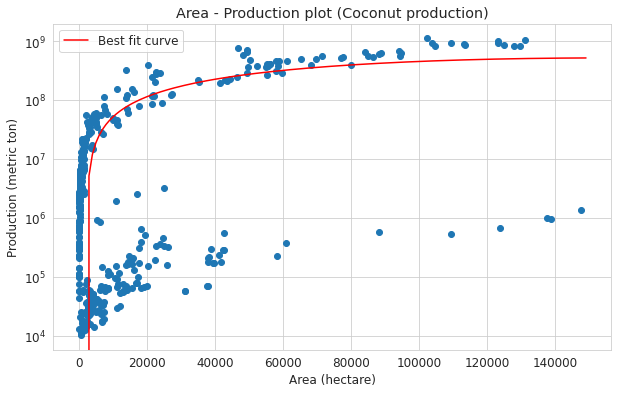

In [ ]:
sns.set_style('whitegrid')
fig = plt.figure(figsize = (10, 6))
plt.scatter(X_test1,y_test1)
plt.plot(X_axis1, y_axis1, color = 'r')
plt.yscale('log')
plt.xlabel('Area (hectare)')
plt.ylabel('Production (metric ton)')
plt.title('Area - Production plot (Coconut production)')
plt.legend(['Best fit curve'])
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/coconut_avsp_bp.png', dpi = 600)

In [ ]:
predicted_coconut_p = lr_poly.predict(X_test1_poly)
predicted_coconut_p[0:5]

array([ 4.20350421e+07,  1.16676284e+08,  8.38030897e+07, -1.47462729e+07,
       -5.60073458e+06])

In [ ]:
# R squared value
from sklearn.metrics import r2_score
r2 = r2_score(y_test1, predicted_coconut_p)
print('R squared value: ',r2)

R squared value:  0.6098820237306174


In [ ]:
# Sugarcane
df_sugarcane_yrp_d = df_sugarcane.groupby(['District_Name']).mean()
df_sugarcane_yrp_d = df_sugarcane_yrp_d.reset_index()
df_sugarcane_yrp_d = df_sugarcane_yrp_d.drop('Crop_Year', axis = 1)
df_sugarcane_yrp_d.rename(columns={'District_Name': 'laa'},inplace=True)
df_sugarcane_yrp_d.head()

,laa,Area,Production
0,24 PARAGANAS NORTH,721.722222,57524.611111
1,24 PARAGANAS SOUTH,79.111111,6310.444444
2,ADILABAD,146.857143,12098.857143
3,AGAR MALWA,14.000000,530.000000
4,AGRA,305.222222,14790.722222


In [ ]:
merged_sugarcane_map_district = map_df.merge(df_sugarcane_yrp_d, on = 'laa', how = 'left')
merged_sugarcane_map_district['Production'] = merged_sugarcane_map_district['Production'].fillna(1)
merged_sugarcane_map_district.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry,Area,Production
0,FA001,IND,JAMMU AND KASHMIR,GILGIT,-99999999,0,UNK,UNK,IND,"POLYGON ((77.34422 35.54250, 77.33660 35.54279...",NaN,1.0
1,FA001,IND,JAMMU AND KASHMIR,TRIBAL TERRITORY,-99999999,0,UNK,UNK,IND,"POLYGON ((73.13781 35.81256, 73.14411 35.81022...",NaN,1.0
2,FA001,IND,JAMMU AND KASHMIR,GILGIT WAZARAT,-99999999,0,UNK,UNK,IND,"POLYGON ((75.07278 34.85332, 75.06958 34.83883...",NaN,1.0
3,FA001,IND,JAMMU AND KASHMIR,CHILAS,-99999999,0,UNK,UNK,IND,"POLYGON ((74.18809 35.66722, 74.23426 35.64655...",NaN,1.0
4,FA001,IND,JAMMU AND KASHMIR,MUZAFFARABAD,-99999999,0,UNK,UNK,IND,"POLYGON ((74.08553 35.07817, 74.09612 35.07642...",NaN,1.0


In [ ]:
merged_sugarcane_map_district.Production.min()

0.0

In [ ]:
merged_sugarcane_map_district.loc[merged_sugarcane_map_district.Production == 0, 'Production'] = 1

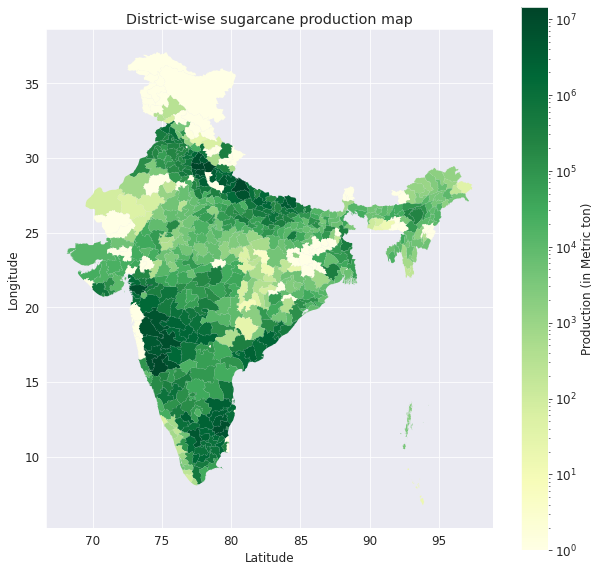

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 1, figsize = (10,10))
merged_sugarcane_map_district.plot(column = 'Production', cmap = 'YlGn', linewidth=0, legend = True, ax = ax,
                                   legend_kwds = {'label':'Production (in Metric ton)'}, 
                                   norm = clr.LogNorm(vmin = merged_sugarcane_map_district.Production.min(), 
                                                      vmax = merged_sugarcane_map_district.Production.max()))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('District-wise sugarcane production map')

fig.savefig('/content/gdrive/My Drive/Datasets/Plots/sugarcane_production_avg.png', dpi = 600)

In [ ]:
df_sugarcane_s = df_sugarcane[df_sugarcane['Crop_Year'] < 2015]

In [ ]:
yearly_p_sugarcane = df_sugarcane_s.groupby(['Crop_Year']).sum()
yearly_p_sugarcane = yearly_p_sugarcane.reset_index()
yearly_p_sugarcane.head()

,Crop_Year,Area,Production
0,1997,3482848.0,501229055.0
1,1998,3669497.0,259809110.0
2,1999,4126394.0,294092445.8
3,2000,4328291.0,296117297.3
4,2001,4403618.0,296512607.1


In [ ]:
X_Y_Spline2 = make_interp_spline(yearly_p_sugarcane['Crop_Year'], yearly_p_sugarcane['Production'])

X_2 = np.linspace(yearly_p_sugarcane.Crop_Year.min(), yearly_p_sugarcane.Crop_Year.max(), 150)
Y_2 = X_Y_Spline2(X_2)

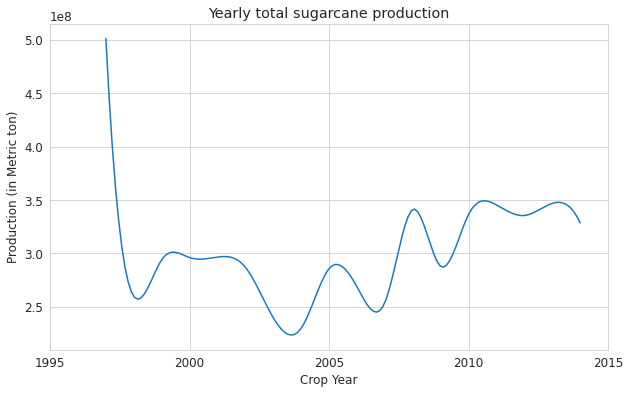

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.plot(X_2, Y_2)
plt.xticks(np.arange(1995, 2016, 5))
plt.xlabel('Crop Year')
plt.ylabel('Production (in Metric ton)')
plt.title('Yearly total sugarcane production')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/sugarcane_yrp.png', dpi = 600)

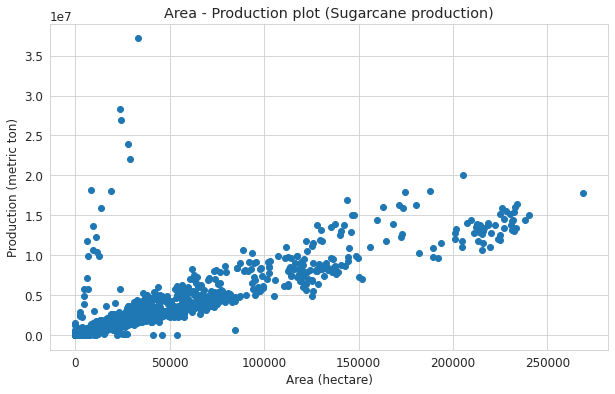

In [ ]:
sns.set_style('whitegrid')
fig = plt.figure(figsize = (10,6))
plt.scatter(df_sugarcane_s['Area'], df_sugarcane_s['Production'])
plt.xlabel('Area (hectare)')
plt.ylabel('Production (metric ton)')
plt.title('Area - Production plot (Sugarcane production)')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/sugarcane_avsp.png', dpi = 600)

In [ ]:
upper_limit2 = df_sugarcane_s['Production'].quantile(0.99)
upper_limit2

11751066.86

In [ ]:
# Removing outlier
df_sugarcane_ro = df_sugarcane_s[df_sugarcane_s['Production'] < upper_limit2]

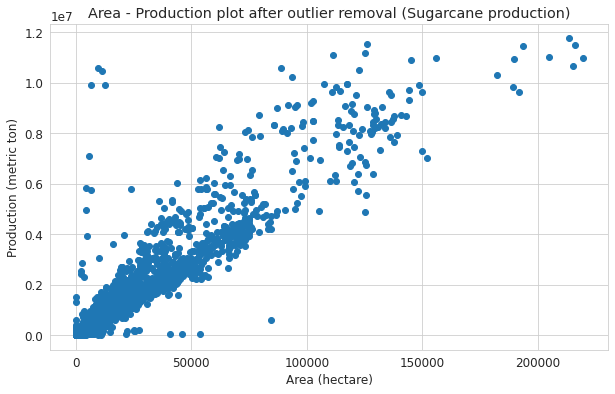

In [ ]:
fig = plt.figure(figsize = (10,6))
plt.scatter(df_sugarcane_ro['Area'], df_sugarcane_ro['Production'])
plt.xlabel('Area (hectare)')
plt.ylabel('Production (metric ton)')
plt.title('Area - Production plot after outlier removal (Sugarcane production)')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/sugarcane_avsp_or.png', dpi = 600)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_sugarcane_ro['Area'], df_sugarcane_ro['Production'],
                                                    train_size=0.7, test_size=0.3, random_state=42)
X_train2_df, X_test2_df = pd.DataFrame(X_train2), pd.DataFrame(X_test2)
y_train2_df, y_test2_df = pd.DataFrame(y_train2), pd.DataFrame(y_test2)
print(len(X_train2_df))
print(len(X_test2_df))

5404
2317


In [ ]:
poly2 = PolynomialFeatures(degree = 2)
X_train2_poly, X_test2_poly = poly2.fit_transform(X_train2_df), poly2.fit_transform(X_test2_df)
X_train2_poly[0:5]

array([[1.00000000e+00, 1.00000000e+02, 1.00000000e+04],
       [1.00000000e+00, 1.01930000e+04, 1.03897249e+08],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01],
       [1.00000000e+00, 7.36000000e+02, 5.41696000e+05],
       [1.00000000e+00, 1.60000000e+02, 2.56000000e+04]])

In [ ]:
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train2_poly, y_train2)

b_2 = lr_poly.coef_
b0_2 = lr_poly.intercept_

print('Coefficients: ', b_2)
print('Intercept: ', b0_2)

Coefficients:  [ 0.00000000e+00  7.49274246e+01 -8.46092904e-05]
Intercept:  -10752.008901186171


In [ ]:
X_axis2 = np.arange(0, 250000, 1000)
y_axis2 = b0_2 + b_2[1]*X_axis2 + b_2[2]*(X_axis2 ** 2)

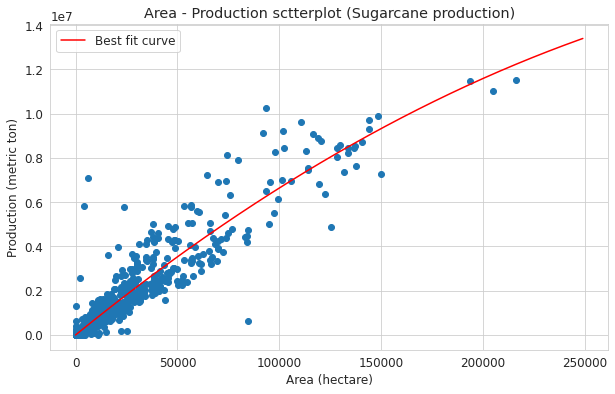

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.scatter(X_test2,y_test2)
plt.plot(X_axis2, y_axis2, color = 'r')
plt.xlabel('Area (hectare)')
plt.ylabel('Production (metric ton)')
plt.title('Area - Production sctterplot (Sugarcane production)')
plt.legend(['Best fit curve'])
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/sugarcane_avsp_bfc.png', dpi = 600)

In [ ]:
predicted_sugarcane_production = lr_poly.predict(X_test2_poly)
predicted_sugarcane_production

array([193243.7411364 ,   5727.92942815,  -9253.49425227, ...,
       161208.02274295,  39710.63933063, 433401.33017416])

In [ ]:
# R squared value
from sklearn.metrics import r2_score
r2 = r2_score(y_test2, predicted_sugarcane_production)
print('R squared value: ', r2)

R squared value:  0.9055075988799582


In [ ]:
# Rice
df_rice_yrp_d = df_rice.groupby(['District_Name']).mean()
df_rice_yrp_d = df_rice_yrp_d.reset_index()
df_rice_yrp_d = df_rice_yrp_d.drop('Crop_Year', axis = 1)
df_rice_yrp_d.rename(columns={'District_Name': 'laa'},inplace=True)
df_rice_yrp_d.head()

,laa,Area,Production
0,24 PARAGANAS NORTH,89722.759259,237106.425926
1,24 PARAGANAS SOUTH,137020.592593,295596.703704
2,ADILABAD,34739.235294,81527.705882
3,AGAR MALWA,2.000000,1.000000
4,AGRA,2564.000000,5781.409091


In [ ]:
merged_rice_map_district = map_df.merge(df_rice_yrp_d, on = 'laa', how = 'left')
merged_rice_map_district['Production'] = merged_rice_map_district['Production'].fillna(1)
merged_rice_map_district.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry,Area,Production
0,FA001,IND,JAMMU AND KASHMIR,GILGIT,-99999999,0,UNK,UNK,IND,"POLYGON ((77.34422 35.54250, 77.33660 35.54279...",NaN,1.0
1,FA001,IND,JAMMU AND KASHMIR,TRIBAL TERRITORY,-99999999,0,UNK,UNK,IND,"POLYGON ((73.13781 35.81256, 73.14411 35.81022...",NaN,1.0
2,FA001,IND,JAMMU AND KASHMIR,GILGIT WAZARAT,-99999999,0,UNK,UNK,IND,"POLYGON ((75.07278 34.85332, 75.06958 34.83883...",NaN,1.0
3,FA001,IND,JAMMU AND KASHMIR,CHILAS,-99999999,0,UNK,UNK,IND,"POLYGON ((74.18809 35.66722, 74.23426 35.64655...",NaN,1.0
4,FA001,IND,JAMMU AND KASHMIR,MUZAFFARABAD,-99999999,0,UNK,UNK,IND,"POLYGON ((74.08553 35.07817, 74.09612 35.07642...",NaN,1.0


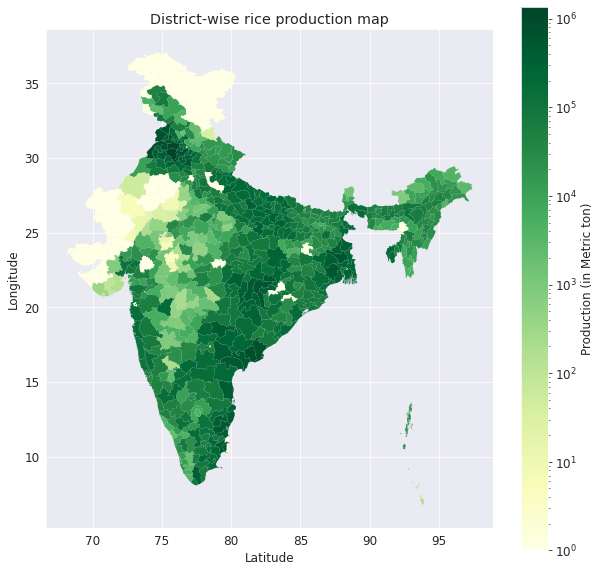

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 1, figsize = (10,10))
merged_rice_map_district.plot(column = 'Production', cmap = 'YlGn', linewidth=0, legend = True, ax = ax,
                              legend_kwds = {'label':'Production (in Metric ton)'},
                              norm = clr.LogNorm(vmin = merged_rice_map_district.Production.min(), 
                                                 vmax = merged_rice_map_district.Production.max()))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('District-wise rice production map')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/rice_production_avg.png', dpi = 600)

In [ ]:
df_rice_s = df_rice[df_rice['Crop_Year'] < 2015]

In [ ]:
yearly_p_rice = df_rice_s.groupby(['Crop_Year']).sum()
yearly_p_rice = yearly_p_rice.reset_index()
yearly_p_rice.head()

,Crop_Year,Area,Production
0,1997,30706467.0,65848504.0
1,1998,38716952.0,78761219.0
2,1999,37058642.0,77917065.6
3,2000,43190617.0,83092698.8
4,2001,42745829.0,90057868.0


In [ ]:
X_Y_Spline3 = make_interp_spline(yearly_p_rice['Crop_Year'], yearly_p_rice['Production'])

X_3 = np.linspace(yearly_p_rice.Crop_Year.min(), yearly_p_rice.Crop_Year.max(), 150)
Y_3 = X_Y_Spline3(X_3)

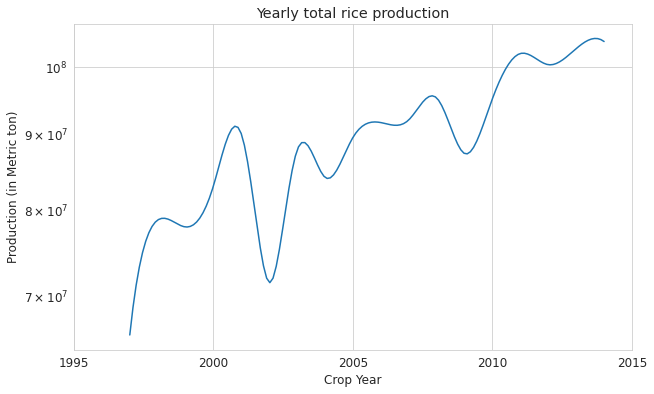

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.plot(X_3, Y_3)
plt.xticks(np.arange(1995, 2016, 5))
plt.yscale('log')
plt.xlabel('Crop Year')
plt.ylabel('Production (in Metric ton)')
plt.title('Yearly total rice production')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/rice_yrp.png', dpi = 600)

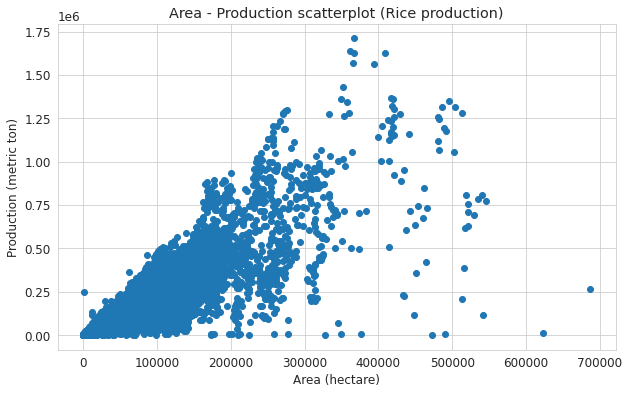

In [ ]:
sns.set_style('whitegrid')
fig = plt.figure(figsize = (10, 6))
plt.scatter(df_rice_s['Area'], df_rice_s['Production'])
plt.xlabel('Area (hectare)')
plt.ylabel('Production (metric ton)')
plt.title('Area - Production scatterplot (Rice production)')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/rice_avsp.png', dpi = 600)

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_rice_s['Area'], df_rice_s['Production'],
                                                    train_size=0.7, test_size=0.3, random_state=56)
X_train3_df, X_test3_df = pd.DataFrame(X_train3), pd.DataFrame(X_test3)
y_train3_df, y_test3_df = pd.DataFrame(y_train3), pd.DataFrame(y_test3)
print(len(X_train3_df))
print(len(X_test3_df))

10502
4501


In [ ]:
X_train3 = X_train3.values.reshape(-1, 1)
y_train3 = y_train3.values.reshape(-1, 1)
X_test3 = X_test3.values.reshape(-1, 1)
y_test3 = y_test3.values.reshape(-1, 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
model.fit(X_train3, y_train3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(random_state=0)

In [ ]:
predict = model.predict(X_test3)
predict

array([140376.71      ,  99081.99666667, 254320.52      , ...,
         3769.49      , 106147.4481    ,   6229.18948413])

In [ ]:
# R squared value
from sklearn.metrics import r2_score
r2 = r2_score(y_test3,predict)
print('R squared value: ',r2)

R squared value:  0.7147087532016874


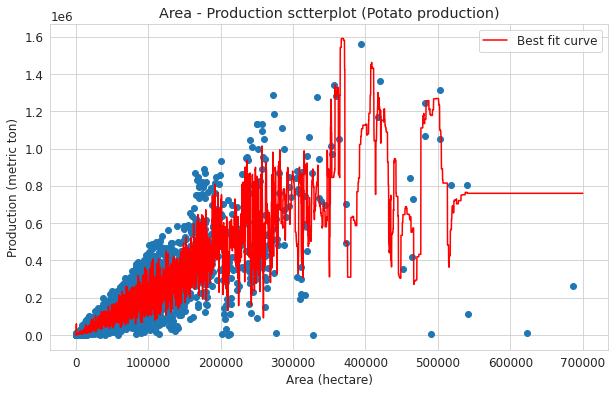

In [ ]:
fig = plt.figure(figsize=(10,6))
X_axis3 = np.arange(0, 700000, 100)
X_axis3 = X_axis3.reshape((len(X_axis3), 1))
plt.scatter(X_test3_df, y_test3_df)
plt.plot(X_axis3, model.predict(X_axis3), 'r')
plt.xlabel('Area (hectare)')
plt.ylabel('Production (metric ton)')
plt.title('Area - Production sctterplot (Potato production)')
plt.legend(['Best fit curve'])
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/rice_avsp_bfc.png', dpi = 600)

In [ ]:
# Wheat
df_wheat_yrp_d = df_wheat.groupby(['District_Name']).mean()
df_wheat_yrp_d = df_wheat_yrp_d.reset_index()
df_wheat_yrp_d = df_wheat_yrp_d.drop('Crop_Year', axis = 1)
df_wheat_yrp_d.rename(columns={'District_Name': 'laa'},inplace=True)
df_wheat_yrp_d.head()

,laa,Area,Production
0,24 PARAGANAS NORTH,8607.444444,20621.944444
1,24 PARAGANAS SOUTH,2255.166667,5018.444444
2,ADILABAD,3527.764706,2883.529412
3,AGAR MALWA,40434.000000,91502.000000
4,AGRA,132325.944444,440388.666667


In [ ]:
merged_wheat_map_district = map_df.merge(df_wheat_yrp_d, on = 'laa', how = 'left')
merged_wheat_map_district['Production'] = merged_wheat_map_district['Production'].fillna(1)
merged_wheat_map_district.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry,Area,Production
0,FA001,IND,JAMMU AND KASHMIR,GILGIT,-99999999,0,UNK,UNK,IND,"POLYGON ((77.34422 35.54250, 77.33660 35.54279...",NaN,1.0
1,FA001,IND,JAMMU AND KASHMIR,TRIBAL TERRITORY,-99999999,0,UNK,UNK,IND,"POLYGON ((73.13781 35.81256, 73.14411 35.81022...",NaN,1.0
2,FA001,IND,JAMMU AND KASHMIR,GILGIT WAZARAT,-99999999,0,UNK,UNK,IND,"POLYGON ((75.07278 34.85332, 75.06958 34.83883...",NaN,1.0
3,FA001,IND,JAMMU AND KASHMIR,CHILAS,-99999999,0,UNK,UNK,IND,"POLYGON ((74.18809 35.66722, 74.23426 35.64655...",NaN,1.0
4,FA001,IND,JAMMU AND KASHMIR,MUZAFFARABAD,-99999999,0,UNK,UNK,IND,"POLYGON ((74.08553 35.07817, 74.09612 35.07642...",NaN,1.0


In [ ]:
merged_wheat_map_district.loc[merged_wheat_map_district['Production'] == 0, 'Production'] = 1

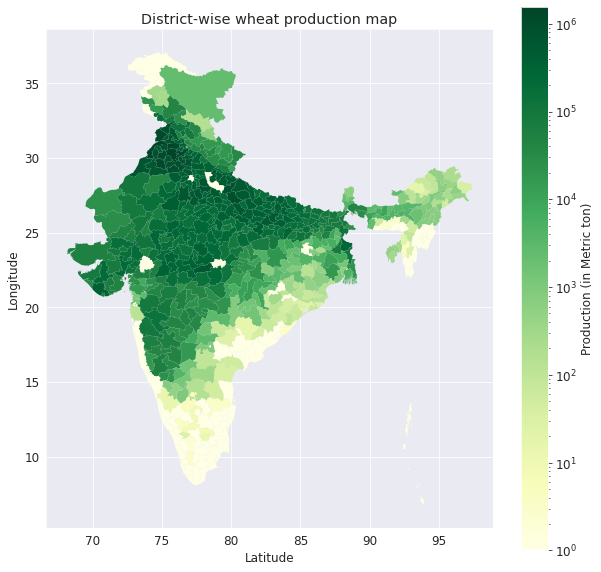

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 1, figsize = (10,10))
merged_wheat_map_district.plot(column = 'Production', cmap = 'YlGn', linewidth=0, legend = True, ax = ax,
                               legend_kwds = {'label':'Production (in Metric ton)'},
                               norm = clr.LogNorm(vmin = merged_wheat_map_district.Production.min(), 
                                                  vmax = merged_wheat_map_district.Production.max()))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('District-wise wheat production map')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/wheat_production_avg.png', dpi = 600)

In [ ]:
df_wheat_s = df_wheat[df_wheat['Crop_Year'] < 2015]

In [ ]:
yearly_p_wheat = df_wheat_s.groupby(['Crop_Year']).sum()
yearly_p_wheat = yearly_p_wheat.reset_index()
yearly_p_wheat.head()

,Crop_Year,Area,Production
0,1997,25640826.0,63831633.0
1,1998,26628190.0,69699079.0
2,1999,26734280.0,75068369.0
3,2000,25626459.0,69487129.9
4,2001,26294085.0,72648945.9


In [ ]:
X_Y_Spline4 = make_interp_spline(yearly_p_wheat['Crop_Year'], yearly_p_wheat['Production'])

X_4 = np.linspace(yearly_p_wheat.Crop_Year.min(), yearly_p_wheat.Crop_Year.max(), 100)
Y_4 = X_Y_Spline4(X_4)

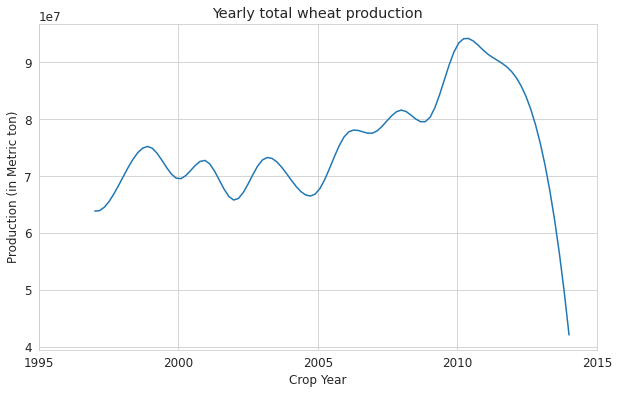

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.plot(X_4, Y_4)
plt.xticks(np.arange(1995, 2016, 5))
plt.xlabel('Crop Year')
plt.ylabel('Production (in Metric ton)')
plt.title('Yearly total wheat production')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/wheat_yrp.png', dpi = 600)

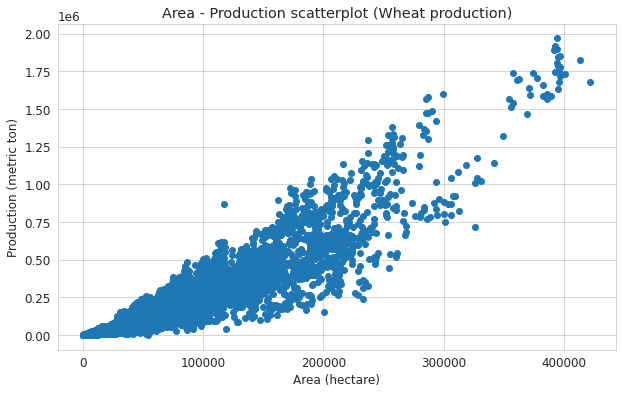

In [ ]:
sns.set_style('whitegrid')
fig = plt.figure(figsize = (10, 6))
plt.scatter(df_wheat_s['Area'], df_wheat_s['Production'])
plt.xlabel('Area (hectare)')
plt.ylabel('Production (metric ton)')
plt.title('Area - Production scatterplot (Wheat production)')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/wheat_avsp.png', dpi = 600)

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(df_wheat_s['Area'], df_wheat_s['Production'],
                                                    train_size=0.7, test_size=0.3, random_state=56)
X_train4_df, X_test4_df = pd.DataFrame(X_train4), pd.DataFrame(X_test4)
y_train4_df, y_test4_df = pd.DataFrame(y_train4), pd.DataFrame(y_test4)
print(len(X_train4_df))
print(len(X_test4_df))

5503
2359


In [ ]:
poly4 = PolynomialFeatures(degree = 2)
X_train4_poly, X_test4_poly = poly4.fit_transform(X_train4_df), poly4.fit_transform(X_test4_df)
X_train4_poly[0:4]

array([[1.0000000e+00, 3.0300000e+04, 9.1809000e+08],
       [1.0000000e+00, 3.0000000e+00, 9.0000000e+00],
       [1.0000000e+00, 8.1120000e+04, 6.5804544e+09],
       [1.0000000e+00, 5.0000000e+00, 2.5000000e+01]])

In [ ]:
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train4_poly, y_train4)

b_4 = lr_poly.coef_
b0_4 = lr_poly.intercept_

print('Coefficients: ', b_4)
print('Intercept: ', b0_4)

Coefficients:  [0.00000000e+00 2.12378347e+00 5.66565205e-06]
Intercept:  -4754.214318411949


In [ ]:
X_axis4 = np.arange(0, 440000, 1000)
y_axis4 = b0_4 + b_4[1]*X_axis4 + b_4[2]*(X_axis4 ** 2)

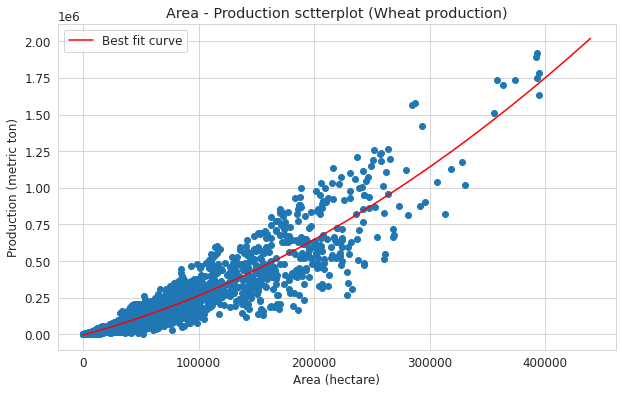

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.scatter(X_test4,y_test4)
plt.plot(X_axis4, y_axis4, color = 'r')
plt.xlabel('Area (hectare)')
plt.ylabel('Production (metric ton)')
plt.title('Area - Production sctterplot (Wheat production)')
plt.legend(['Best fit curve'])
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/wheat_avsp_bfc.png', dpi = 600)

In [ ]:
predicted_wheat_p = lr_poly.predict(X_test4_poly)
predicted_wheat_p

array([ 57099.80668092,   3831.56998119,   6879.42681553, ...,
        -4010.19606269, 149584.32166205,  38342.86284855])

In [ ]:
# R squared value
from sklearn.metrics import r2_score
r2 = r2_score(y_test4, predicted_wheat_p)
print('R squared value: ',r2)

R squared value:  0.8741991657050129


In [ ]:
# Potato
df_potato_yrp_d = df_potato.groupby(['District_Name']).mean()
df_potato_yrp_d = df_potato_yrp_d.reset_index()
df_potato_yrp_d = df_potato_yrp_d.drop('Crop_Year', axis = 1)
df_potato_yrp_d.rename(columns={'District_Name': 'laa'},inplace=True)
df_potato_yrp_d.head()

,laa,Area,Production
0,24 PARAGANAS NORTH,7513.222222,1.899381e+05
1,24 PARAGANAS SOUTH,3580.500000,7.501150e+04
2,ADILABAD,7.666667,4.333333e+01
3,AGAR MALWA,795.000000,1.067900e+04
4,AGRA,40219.666667,1.056073e+06


In [ ]:
merged_potato_map_district = map_df.merge(df_potato_yrp_d, on = 'laa', how = 'left')
merged_potato_map_district['Production'] = merged_potato_map_district['Production'].fillna(1)
merged_potato_map_district.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry,Area,Production
0,FA001,IND,JAMMU AND KASHMIR,GILGIT,-99999999,0,UNK,UNK,IND,"POLYGON ((77.34422 35.54250, 77.33660 35.54279...",NaN,1.0
1,FA001,IND,JAMMU AND KASHMIR,TRIBAL TERRITORY,-99999999,0,UNK,UNK,IND,"POLYGON ((73.13781 35.81256, 73.14411 35.81022...",NaN,1.0
2,FA001,IND,JAMMU AND KASHMIR,GILGIT WAZARAT,-99999999,0,UNK,UNK,IND,"POLYGON ((75.07278 34.85332, 75.06958 34.83883...",NaN,1.0
3,FA001,IND,JAMMU AND KASHMIR,CHILAS,-99999999,0,UNK,UNK,IND,"POLYGON ((74.18809 35.66722, 74.23426 35.64655...",NaN,1.0
4,FA001,IND,JAMMU AND KASHMIR,MUZAFFARABAD,-99999999,0,UNK,UNK,IND,"POLYGON ((74.08553 35.07817, 74.09612 35.07642...",NaN,1.0


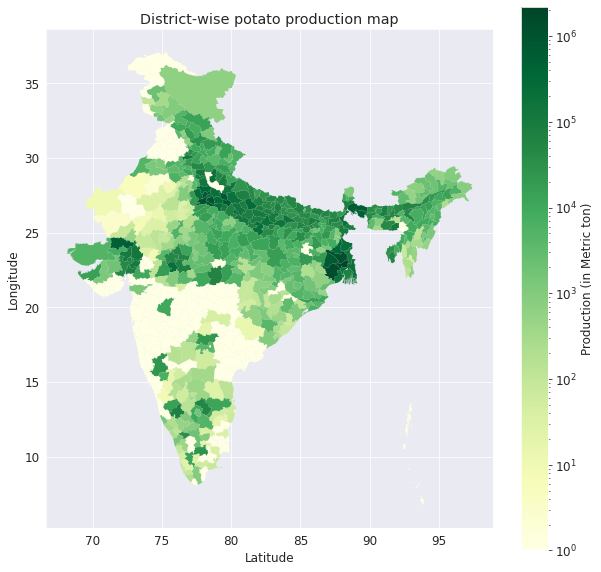

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
merged_potato_map_district.plot(column = 'Production', cmap = 'YlGn', linewidth=0,legend = True, ax = ax,
                                legend_kwds = {'label':'Production (in Metric ton)'}, 
                                norm = clr.LogNorm(vmin = merged_potato_map_district.Production.min(), 
                                                   vmax = merged_potato_map_district.Production.max()))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('District-wise potato production map')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/potato_production_avg.png', dpi = 600)

In [ ]:
df_potato_s = df_potato[df_potato['Crop_Year'] < 2015]

In [ ]:
yearly_p_potato = df_potato_s.groupby(['Crop_Year']).sum()
yearly_p_potato = yearly_p_potato.reset_index()
yearly_p_potato.head()

,Crop_Year,Area,Production
0,1997,941622.0,14095119.0
1,1998,1086040.0,20042976.0
2,1999,1147954.0,21777579.0
3,2000,1074282.0,20332883.9
4,2001,1106407.0,22344741.3


In [ ]:
X_Y_Spline5 = make_interp_spline(yearly_p_potato['Crop_Year'], yearly_p_potato['Production'])

X_5 = np.linspace(yearly_p_potato.Crop_Year.min(), yearly_p_potato.Crop_Year.max(), 150)
Y_5 = X_Y_Spline5(X_5)

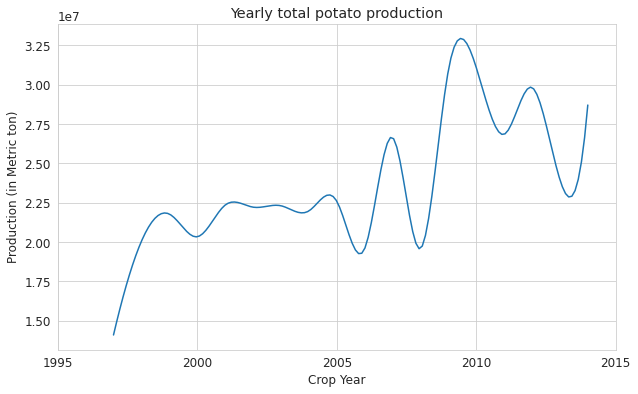

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.plot(X_5, Y_5)
plt.xticks(np.arange(1995, 2016, 5))
plt.xlabel('Crop Year')
plt.ylabel('Production (in Metric ton)')
plt.title('Yearly total potato production')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/potato_yrp.png', dpi = 600)

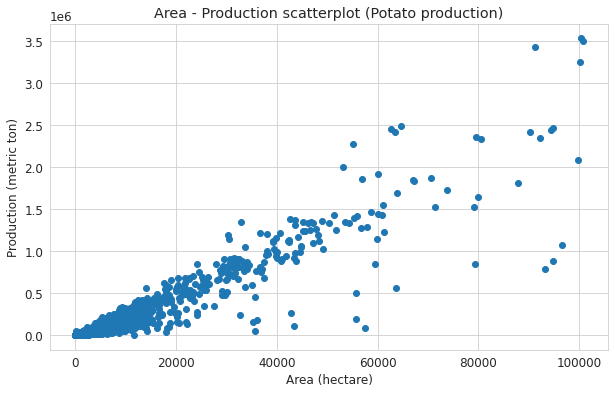

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
plt.scatter(df_potato['Area'], df_potato['Production'])
plt.xlabel('Area (hectare)')
plt.ylabel('Production (metric ton)')
plt.title('Area - Production scatterplot (Potato production)')
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/potato_avsp.png', dpi = 600)

In [ ]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(df_potato['Area'], df_potato['Production'],
                                                    train_size=0.7, test_size=0.3, random_state=60)
X_train5_df, X_test5_df = pd.DataFrame(X_train5), pd.DataFrame(X_test5)
y_train5_df, y_test5_df = pd.DataFrame(y_train5), pd.DataFrame(y_test5)
print(len(X_train5_df))
print(len(X_test5_df))

4839
2075


In [ ]:
poly5 = PolynomialFeatures(degree = 2)
X_train5_poly, X_test5_poly = poly5.fit_transform(X_train5_df), poly5.fit_transform(X_test5_df)
X_train5_poly[0:5]

array([[1.0000000e+00, 6.0810000e+03, 3.6978561e+07],
       [1.0000000e+00, 9.4000000e+01, 8.8360000e+03],
       [1.0000000e+00, 3.2000000e+01, 1.0240000e+03],
       [1.0000000e+00, 1.5400000e+02, 2.3716000e+04],
       [1.0000000e+00, 9.3200000e+02, 8.6862400e+05]])

In [ ]:
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train5_poly, y_train5)

b_5 = lr_poly.coef_
b0_5 = lr_poly.intercept_

print('Coefficients: ', b_5)
print('Intercept: ', b0_5)

Coefficients:  [0.00000000e+00 2.18673332e+01 2.05090610e-05]
Intercept:  -10673.403955379661


In [ ]:
X_axis5 = np.arange(0, 110000, 1000)
y_axis5 = b0_5 + b_5[1]*X_axis5 + b_5[2]*(X_axis5 ** 2)

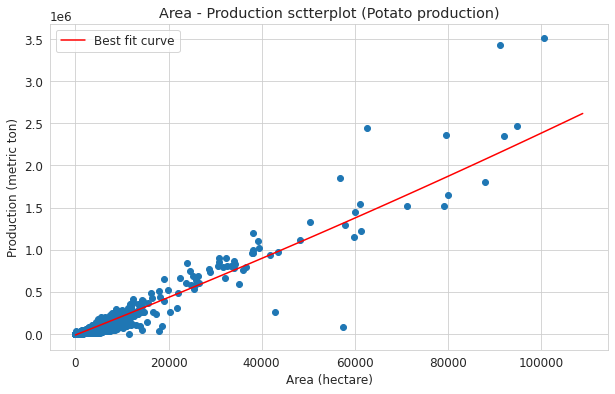

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.scatter(X_test5, y_test5)
plt.plot(X_axis5, y_axis5, color = 'r')
plt.xlabel('Area (hectare)')
plt.ylabel('Production (metric ton)')
plt.title('Area - Production sctterplot (Potato production)')
plt.legend(['Best fit curve'])
fig.savefig('/content/gdrive/My Drive/Datasets/Plots/potato_avsp_bfc.png', dpi = 600)

In [ ]:
predicted_potato_p = lr_poly.predict(X_test5_poly)
predicted_potato_p

array([  6636.48876624,  29083.36733444, 490972.25045241, ...,
        -5752.21570546,  -2032.60739985,  89049.06708692])

In [ ]:
# R squared value
from sklearn.metrics import r2_score
r2 = r2_score(y_test5, predicted_potato_p)
print('R squared value: ',r2)

R squared value:  0.901461853208523


In [ ]:
df_wb = df[df['State_Name'] == 'West Bengal']
df_wb.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
232102,West Bengal,24 PARAGANAS NORTH,1997,Autumn,Rice,15017.0,33840.0
232103,West Bengal,24 PARAGANAS NORTH,1997,Autumn,Jute,52568.0,677510.0
232104,West Bengal,24 PARAGANAS NORTH,1997,Autumn,Mesta,690.0,6710.0
232105,West Bengal,24 PARAGANAS NORTH,1997,Autumn,Urad,1992.0,1310.0
232106,West Bengal,24 PARAGANAS NORTH,1997,Winter,Gram,267.0,160.0


In [ ]:
# Top 5 crops produced in West Bengal
df_wb_yrcp = df_wb.groupby(['Crop', 'Crop_Year']).sum()
df_wb_yrcp = df_wb_yrcp.reset_index()
df_wb_yrcp = df_wb_yrcp.groupby(['Crop']).mean()
df_wb_yrcp = df_wb_yrcp.drop('Crop_Year', axis = 1)
df_wb_yrcp = df_wb_yrcp.sort_values(by = 'Production', ascending = False)
df_wb_yrcp.head()

,Area,Production
Crop,,
Coconut,2.535975e+04,5.982010e+07
Oilseeds total,5.080810e+07,3.865730e+07
Rice,5.666303e+06,1.433849e+07
Pulses total,1.933239e+07,1.415068e+07
Potato,3.574092e+05,8.609828e+06


In [ ]:
df_wb_coconut = df_wb[df_wb['Crop'] == 'Coconut']
df_wb_oilseed = df_wb[df_wb['Crop'] == 'Oilseeds total']
df_wb_rice = df_wb[df_wb['Crop'] == 'Rice']
df_wb_pulses = df_wb[df_wb['Crop'] == 'Pulses total']
df_wb_potato = df_wb[df_wb['Crop'] == 'Potato']

In [ ]:
# Coconut
df_wb_coconut_yrpd = df_wb_coconut.groupby(['District_Name']).mean()
df_wb_coconut_yrpd = df_wb_coconut_yrpd.reset_index()
df_wb_coconut_yrpd = df_wb_coconut_yrpd.drop('Crop_Year', axis = 1)
df_wb_coconut_yrpd.rename(columns={'District_Name': 'laa'},inplace=True)
df_wb_coconut_yrpd.head()

,laa,Area,Production
0,24 PARAGANAS NORTH,3136.916667,1.022202e+07
1,24 PARAGANAS SOUTH,3527.166667,7.918108e+06
2,BANKURA,210.666667,5.111582e+05
3,BARDHAMAN,1882.333333,3.836859e+06
4,BIRBHUM,421.583333,1.892200e+06


In [ ]:
merged_coconut_map_wb = map_wb_df.merge(df_wb_coconut_yrpd, on = 'laa', how = 'left')
merged_coconut_map_wb['Production'] = merged_coconut_map_wb['Production'].fillna(1)
merged_coconut_map_wb.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry,Area,Production
0,FA001,IND,WEST BENGAL,DARJEELING,-99999999,0,UNK,UNK,IND,"POLYGON ((88.52539 27.17819, 88.53365 27.17778...",148.916667,4.560568e+05
1,FA001,IND,WEST BENGAL,JALPAIGURI,-99999999,0,UNK,UNK,IND,"POLYGON ((88.87119 26.96381, 88.87171 26.96118...",936.333333,1.902812e+06
2,FA001,IND,WEST BENGAL,COOCHBEHAR,-99999999,0,UNK,UNK,IND,"POLYGON ((89.83556 26.41260, 89.83173 26.40359...",702.500000,1.713174e+06
3,FA001,IND,WEST BENGAL,DINAJPUR UTTAR,-99999999,0,UNK,UNK,IND,"POLYGON ((88.24062 26.44954, 88.24059 26.45300...",250.166667,2.876486e+05
4,FA001,IND,WEST BENGAL,COOCHBEHAR,-99999999,0,UNK,UNK,IND,"POLYGON ((88.96360 26.42879, 88.96066 26.42911...",702.500000,1.713174e+06


Text(0.5, 1.0, 'District-wise coconut production map')

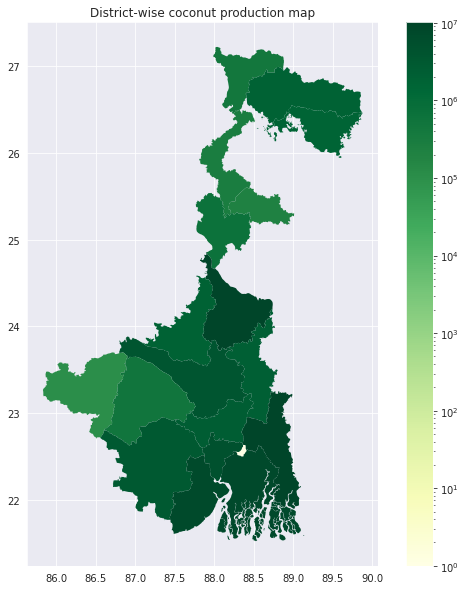

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 1, figsize = (10,10))
merged_coconut_map_wb.plot(column = 'Production', cmap = 'YlGn', linewidth=0, legend = True, ax = ax, 
                                 norm = clr.LogNorm(vmin = merged_coconut_map_wb.Production.min(), 
                                                    vmax = merged_coconut_map_wb.Production.max()))
plt.title('District-wise coconut production map')

In [ ]:
# Oilseed
df_wb_oilseed_yrpd = df_wb_oilseed.groupby(['District_Name']).mean()
df_wb_oilseed_yrpd = df_wb_oilseed_yrpd.reset_index()
df_wb_oilseed_yrpd = df_wb_oilseed_yrpd.drop('Crop_Year', axis = 1)
df_wb_oilseed_yrpd.rename(columns={'District_Name': 'laa'},inplace=True)
df_wb_oilseed_yrpd.head()

,laa,Area,Production
0,24 PARAGANAS NORTH,4205800.0,3183800.0
1,24 PARAGANAS SOUTH,635700.0,502300.0
2,BANKURA,3179900.0,2118200.0
3,BARDHAMAN,3989200.0,2899500.0
4,BIRBHUM,2066100.0,1929800.0


In [ ]:
merged_oilseed_map_wb = map_wb_df.merge(df_wb_oilseed_yrpd, on = 'laa', how = 'left')
merged_oilseed_map_wb['Production'] = merged_oilseed_map_wb['Production'].fillna(1)
merged_oilseed_map_wb.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry,Area,Production
0,FA001,IND,WEST BENGAL,DARJEELING,-99999999,0,UNK,UNK,IND,"POLYGON ((88.52539 27.17819, 88.53365 27.17778...",105600.0,42900.0
1,FA001,IND,WEST BENGAL,JALPAIGURI,-99999999,0,UNK,UNK,IND,"POLYGON ((88.87119 26.96381, 88.87171 26.96118...",1250800.0,561400.0
2,FA001,IND,WEST BENGAL,COOCHBEHAR,-99999999,0,UNK,UNK,IND,"POLYGON ((89.83556 26.41260, 89.83173 26.40359...",1403200.0,614800.0
3,FA001,IND,WEST BENGAL,DINAJPUR UTTAR,-99999999,0,UNK,UNK,IND,"POLYGON ((88.24062 26.44954, 88.24059 26.45300...",3893900.0,2121300.0
4,FA001,IND,WEST BENGAL,COOCHBEHAR,-99999999,0,UNK,UNK,IND,"POLYGON ((88.96360 26.42879, 88.96066 26.42911...",1403200.0,614800.0


Text(0.5, 1.0, 'District-wise oilseed production map')

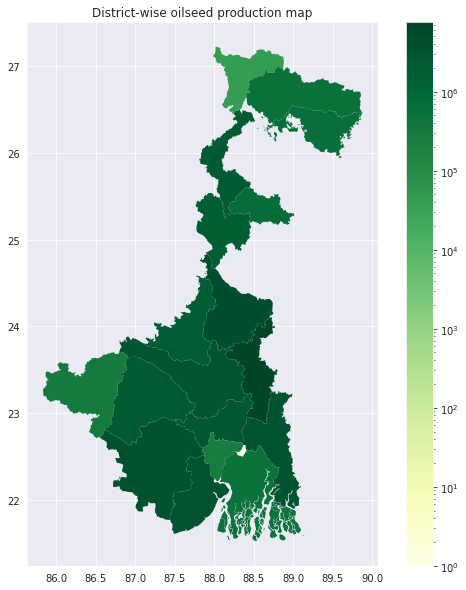

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))
merged_oilseed_map_wb.plot(column = 'Production', cmap = 'YlGn', linewidth=0, legend = True, ax = ax, 
                                 norm = clr.LogNorm(vmin = merged_oilseed_map_wb.Production.min(), 
                                                    vmax = merged_oilseed_map_wb.Production.max()))
plt.title('District-wise oilseed production map')

In [ ]:
# Rice
df_wb_rice_yrpd = df_wb_rice.groupby(['District_Name']).mean()
df_wb_rice_yrpd = df_wb_rice_yrpd.reset_index()
df_wb_rice_yrpd = df_wb_rice_yrpd.drop('Crop_Year', axis = 1)
df_wb_rice_yrpd.rename(columns={'District_Name': 'laa'},inplace=True)
df_wb_rice_yrpd.head()

,laa,Area,Production
0,24 PARAGANAS NORTH,89722.759259,237106.425926
1,24 PARAGANAS SOUTH,137020.592593,295596.703704
2,BANKURA,124060.574074,335929.574074
3,BARDHAMAN,211218.074074,634073.629630
4,BIRBHUM,124343.000000,365806.870370


In [ ]:
merged_rice_map_wb = map_wb_df.merge(df_wb_rice_yrpd, on = 'laa', how = 'left')
merged_rice_map_wb['Production'] = merged_rice_map_wb['Production'].fillna(1)
merged_rice_map_wb.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry,Area,Production
0,FA001,IND,WEST BENGAL,DARJEELING,-99999999,0,UNK,UNK,IND,"POLYGON ((88.52539 27.17819, 88.53365 27.17778...",11284.277778,20261.648148
1,FA001,IND,WEST BENGAL,JALPAIGURI,-99999999,0,UNK,UNK,IND,"POLYGON ((88.87119 26.96381, 88.87171 26.96118...",80473.500000,139255.740741
2,FA001,IND,WEST BENGAL,COOCHBEHAR,-99999999,0,UNK,UNK,IND,"POLYGON ((89.83556 26.41260, 89.83173 26.40359...",92820.314815,176951.703704
3,FA001,IND,WEST BENGAL,DINAJPUR UTTAR,-99999999,0,UNK,UNK,IND,"POLYGON ((88.24062 26.44954, 88.24059 26.45300...",87851.833333,203372.740741
4,FA001,IND,WEST BENGAL,COOCHBEHAR,-99999999,0,UNK,UNK,IND,"POLYGON ((88.96360 26.42879, 88.96066 26.42911...",92820.314815,176951.703704


Text(0.5, 1.0, 'District-wise rice production map')

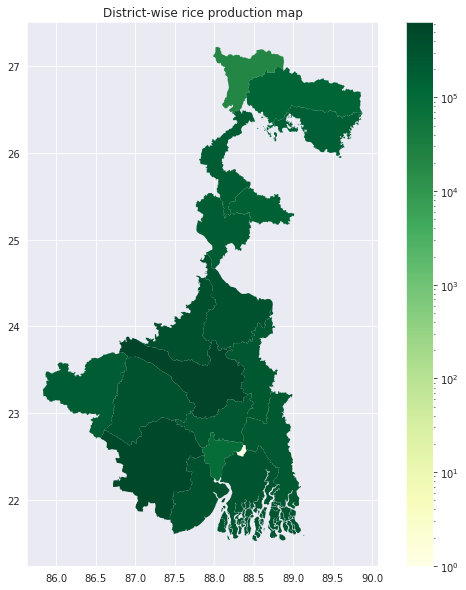

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))
merged_rice_map_wb.plot(column = 'Production', cmap = 'YlGn', linewidth=0, legend = True, ax = ax, 
                                 norm = clr.LogNorm(vmin = merged_rice_map_wb.Production.min(), 
                                                    vmax = merged_rice_map_wb.Production.max()))
plt.title('District-wise rice production map')

In [ ]:
# Pulses
df_wb_pulses_yrpd = df_wb_pulses.groupby(['District_Name']).mean()
df_wb_pulses_yrpd = df_wb_pulses_yrpd.reset_index()
df_wb_pulses_yrpd = df_wb_pulses_yrpd.drop('Crop_Year', axis = 1)
df_wb_pulses_yrpd.rename(columns={'District_Name': 'laa'},inplace=True)
df_wb_pulses_yrpd.head()

,laa,Area,Production
0,24 PARAGANAS NORTH,975200.0,595700.0
1,24 PARAGANAS SOUTH,509600.0,303400.0
2,BANKURA,251500.0,125400.0
3,BARDHAMAN,754700.0,478700.0
4,BIRBHUM,1164800.0,1046800.0


In [ ]:
merged_pulses_map_wb = map_wb_df.merge(df_wb_pulses_yrpd, on = 'laa', how = 'left')
merged_pulses_map_wb['Production'] = merged_pulses_map_wb['Production'].fillna(1)
merged_pulses_map_wb.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry,Area,Production
0,FA001,IND,WEST BENGAL,DARJEELING,-99999999,0,UNK,UNK,IND,"POLYGON ((88.52539 27.17819, 88.53365 27.17778...",189700.0,131700.0
1,FA001,IND,WEST BENGAL,JALPAIGURI,-99999999,0,UNK,UNK,IND,"POLYGON ((88.87119 26.96381, 88.87171 26.96118...",669400.0,437300.0
2,FA001,IND,WEST BENGAL,COOCHBEHAR,-99999999,0,UNK,UNK,IND,"POLYGON ((89.83556 26.41260, 89.83173 26.40359...",785700.0,486700.0
3,FA001,IND,WEST BENGAL,DINAJPUR UTTAR,-99999999,0,UNK,UNK,IND,"POLYGON ((88.24062 26.44954, 88.24059 26.45300...",469700.0,690300.0
4,FA001,IND,WEST BENGAL,COOCHBEHAR,-99999999,0,UNK,UNK,IND,"POLYGON ((88.96360 26.42879, 88.96066 26.42911...",785700.0,486700.0


Text(0.5, 1.0, 'District-wise pulses production map')

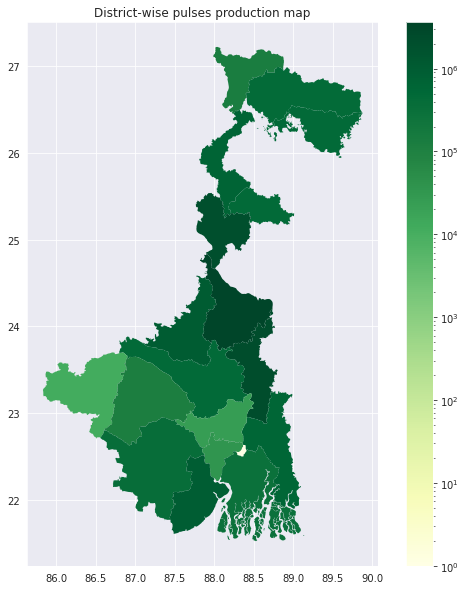

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))
merged_pulses_map_wb.plot(column = 'Production', cmap = 'YlGn', linewidth=0, legend = True, ax = ax, 
                                 norm = clr.LogNorm(vmin = merged_pulses_map_wb.Production.min(), 
                                                    vmax = merged_pulses_map_wb.Production.max()))
plt.title('District-wise pulses production map')

In [ ]:
# Potato
df_wb_potato_yrpd = df_wb_potato.groupby(['District_Name']).mean()
df_wb_potato_yrpd = df_wb_potato_yrpd.reset_index()
df_wb_potato_yrpd = df_wb_potato_yrpd.drop('Crop_Year', axis = 1)
df_wb_potato_yrpd.rename(columns={'District_Name': 'laa'},inplace=True)
df_wb_potato_yrpd.head()

,laa,Area,Production
0,24 PARAGANAS NORTH,7513.222222,1.899381e+05
1,24 PARAGANAS SOUTH,3580.500000,7.501150e+04
2,BANKURA,27430.111111,6.688109e+05
3,BARDHAMAN,49617.611111,1.304315e+06
4,BIRBHUM,14844.555556,3.391382e+05


In [ ]:
merged_potato_map_wb = map_wb_df.merge(df_wb_potato_yrpd, on = 'laa', how = 'left')
merged_potato_map_wb['Production'] = merged_potato_map_wb['Production'].fillna(1)
merged_potato_map_wb.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry,Area,Production
0,FA001,IND,WEST BENGAL,DARJEELING,-99999999,0,UNK,UNK,IND,"POLYGON ((88.52539 27.17819, 88.53365 27.17778...",4937.538462,76741.000000
1,FA001,IND,WEST BENGAL,JALPAIGURI,-99999999,0,UNK,UNK,IND,"POLYGON ((88.87119 26.96381, 88.87171 26.96118...",26109.222222,612795.666667
2,FA001,IND,WEST BENGAL,COOCHBEHAR,-99999999,0,UNK,UNK,IND,"POLYGON ((89.83556 26.41260, 89.83173 26.40359...",21701.611111,481332.111111
3,FA001,IND,WEST BENGAL,DINAJPUR UTTAR,-99999999,0,UNK,UNK,IND,"POLYGON ((88.24062 26.44954, 88.24059 26.45300...",8401.222222,197513.388889
4,FA001,IND,WEST BENGAL,COOCHBEHAR,-99999999,0,UNK,UNK,IND,"POLYGON ((88.96360 26.42879, 88.96066 26.42911...",21701.611111,481332.111111


Text(0.5, 1.0, 'District-wise potato production map')

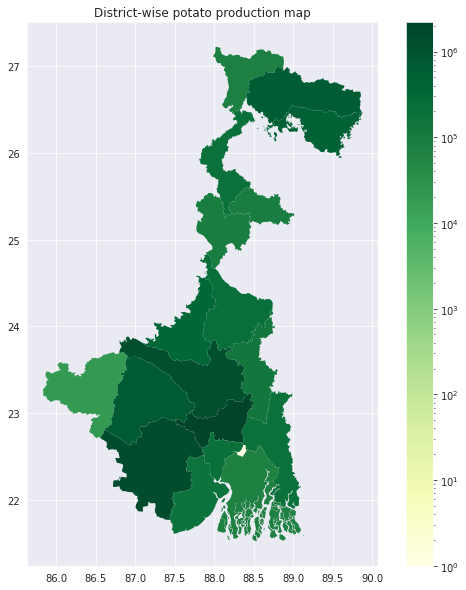

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))
merged_potato_map_wb.plot(column = 'Production', cmap = 'YlGn', linewidth=0, legend = True, ax = ax, 
                                 norm = clr.LogNorm(vmin = merged_potato_map_wb.Production.min(), 
                                                    vmax = merged_potato_map_wb.Production.max()))
plt.title('District-wise potato production map')